In [1]:
import aacdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_intakes = aacdata.clean_intake_data('data/Austin_Animal_Center_Intakes.csv')
df_outcomes = aacdata.clean_outcome_data('data/Austin_Animal_Center_Outcomes.csv')

## What type of animals are brought into the shelter and for what reasons?

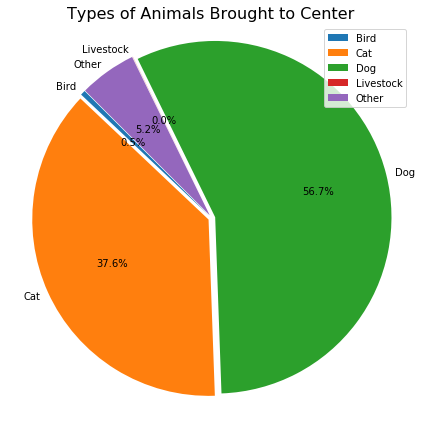

In [213]:
# get value counts for Animal types and sorty by animal type name
animal_types = df_intakes['Animal Type'].value_counts()
animal_types.sort_index(inplace=True)

# create pie chart of animal types
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
explode = len(animal_types) * (.02, )
ax.pie(animal_types.values, labels=animal_types.index, autopct='%1.1f%%', explode=explode,
       labeldistance=1.05, startangle=135)
ax.set_title('Types of Animals Brought to Center', fontsize=16);
ax.legend(loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

* Dogs and Cats are the most common types of animal brought to the Austin Animal Center representing 94.3% of all intakes

In [173]:
df_intake_types_by_animal = df_intakes.groupby(['Animal Type', 'Intake Type'])['Animal ID'].count().unstack(level=0).fillna(0)
df_intake_types_by_animal

Animal Type,Bird,Cat,Dog,Livestock,Other
Intake Type,,,,,
Euthanasia Request,3.0,58.0,182.0,0.0,12.0
Owner Surrender,53.0,7580.0,12263.0,1.0,450.0
Public Assist,104.0,889.0,5388.0,1.0,290.0
Stray,234.0,31742.0,42838.0,13.0,755.0
Wildlife,90.0,0.0,0.0,0.0,4104.0


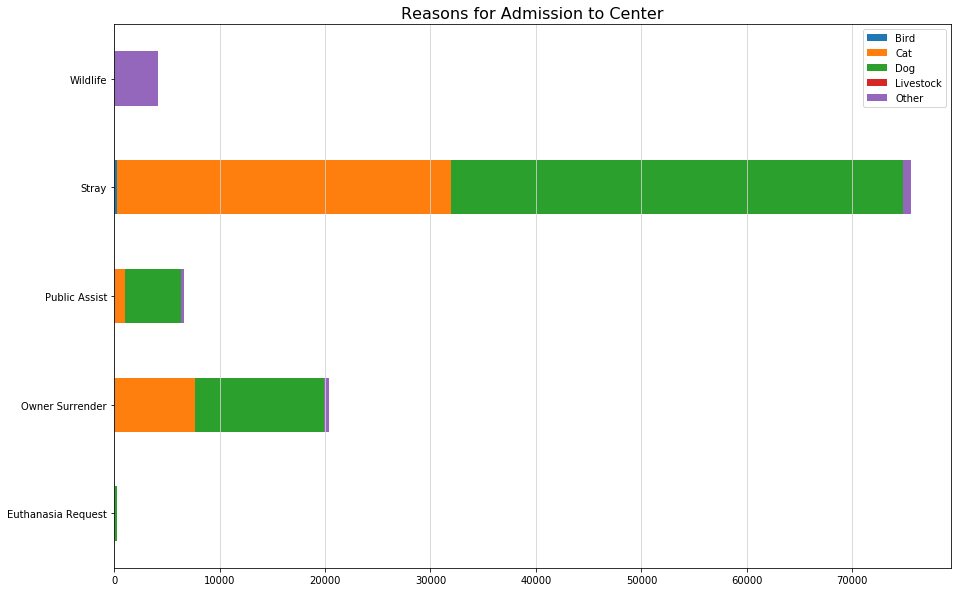

In [33]:
# fig, ax = plt.subplots(figsize=(15,10))
# plt.title('Intake Reasons', fontsize='16')
# plt.xlabel('Reason', fontsize='12')
# plt.ylabel('Count', fontsize='12')

# df_intake_types_by_animal.plot.barh(stacked = True);

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

df_intake_types_by_animal.plot.barh(stacked=True, ax=ax);

ax.set_title('Reasons for Admission to Center', fontsize=16)

# hide the y axis lable
y_axis = ax.yaxis
y_axis.label.set_visible(False)

ax.legend(loc='upper right')
ax.grid(b=True,which="both",axis="x",linestyle="-",color="lightgrey")
plt.show()



* A large majority of animals brought into the center are strays.
* Owner surrender is the next common reason however there is a large gap between those counts and animal brought in as strays.
* Very few animals are brought into the center with a request to euthanize but most of those are dogs.

## When is an animal most likely to be admitted to the Center?

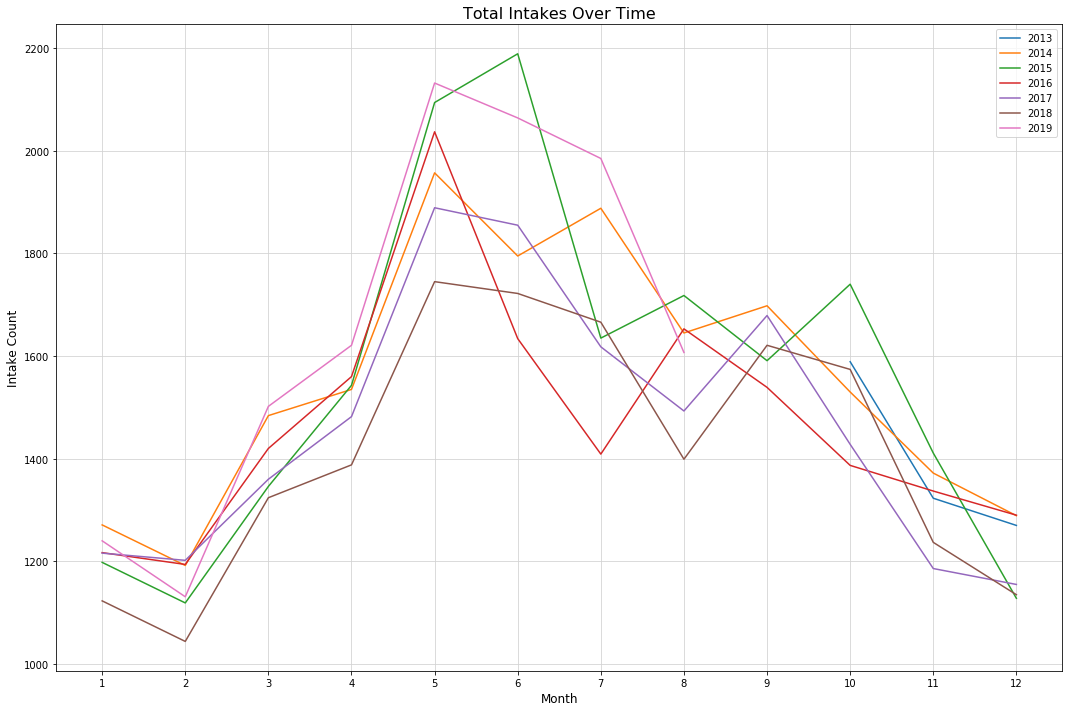

In [128]:
df_intake_yearly_totals = df_intakes.groupby(['Intake Month', 'Intake Year'])['Animal ID'].count().unstack()

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Total Intakes Over Time', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Intake Count', fontsize='12')
# plt.xticks(df_intake_yearly_totals['Intake Month'])
# plt.set_xticks(df_intake_yearly_totals.index)
plt.grid (b=True,which="both",axis="both",linestyle="-",color="lightgrey")
plt.plot(df_intake_yearly_totals)
plt.xticks(df_intake_yearly_totals.index)
plt.legend(df_intake_yearly_totals.columns)

plt.tight_layout()
plt.show()
# plt.xlim(0, mouse_count.index.max()+1) 
# plt.xticks(np.arange(0, mouse_count.index.max()+3 , 5)) # location of separators for timepoint every 5 days


* Reviewing each years totals over month we find that late spring months of May and June tend to have the most intakes while winter months of December, January and February have the least intakes

If we look at the number of aniamls brought into the center by condition, we see most are in the normal condition.  What would be interesting is to see how these conditions relate to the intake reasons.

In [65]:
df_intakes['Intake Condition'].value_counts().to_frame()

,Intake Condition
Normal,94052
Injured,5295
Sick,4076
Nursing,2886
Aged,365
Other,211
Feral,99
Pregnant,66


In [156]:
df_intake_condition = df_intakes.groupby(['Intake Type', 'Intake Condition'])['Animal ID'].count().unstack(level=1).fillna(0)

df_intake_condition.reset_index(inplace=True)
# df_intake_condition['Total'] = df_intake_condition.sum(axis=1)

# df_intake_condition.set_index('Intake Condition', inplace=True)
df_intake_condition

# df_pct = df_intake_condition.iloc[:, 1:].apply(lambda x: x / x.sum() * 100)
# AK keeping abvoe just in case want to use it in refactor

Intake Condition,Intake Type,Aged,Feral,Injured,Normal,Nursing,Other,Pregnant,Sick
0,Euthanasia Request,43.0,0.0,19.0,87.0,0.0,2.0,0.0,104.0
1,Owner Surrender,72.0,9.0,354.0,18998.0,218.0,35.0,12.0,649.0
2,Public Assist,25.0,2.0,156.0,6209.0,77.0,43.0,3.0,157.0
3,Stray,224.0,87.0,4027.0,66465.0,2544.0,127.0,51.0,2057.0
4,Wildlife,1.0,1.0,739.0,2293.0,47.0,4.0,0.0,1109.0


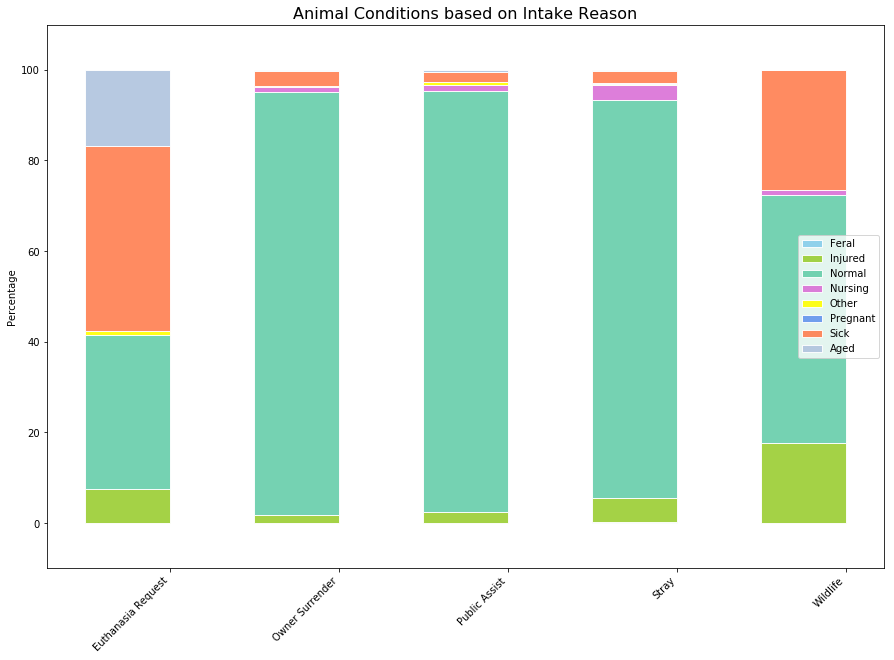

In [170]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(15,10))

# Set bar width at 1
bar_width = .5

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df_intake_condition['Intake Type']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df_intake_condition['Aged'], 
                                 df_intake_condition['Feral'], 
                                 df_intake_condition['Injured'],
                                 df_intake_condition['Normal'],
                                 df_intake_condition['Nursing'],
                                 df_intake_condition['Other'],
                                 df_intake_condition['Pregnant'],
                                 df_intake_condition['Sick'])]

# Create the percentage of the total intake types
feral_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Feral'], totals)]
injured_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Injured'], totals)]
normal_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Normal'], totals)]
nursing_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Nursing'], totals)]
other_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Other'], totals)]
pregnant_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Pregnant'], totals)]
sick_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Sick'], totals)]
aged_rel = [i / j * 100 for  i,j in zip(df_intake_condition['Aged'], totals)]

#create bar chart
ax.bar(bar_l, feral_rel, label='Feral', alpha=0.9, color='skyblue', width=bar_width, edgecolor='white')

ax.bar(bar_l, injured_rel, bottom=feral_rel, label='Injured', alpha=0.9, color='yellowgreen', width=bar_width, 
       edgecolor='white')

ax.bar(bar_l, normal_rel, bottom=[i+j for i,j in zip(feral_rel, injured_rel)], label='Normal', alpha=0.9,
       color='mediumaquamarine', width=bar_width, edgecolor='white')

ax.bar(bar_l, nursing_rel, bottom=[i+j+k for i,j,k in zip(feral_rel, injured_rel, normal_rel)], label='Nursing',
       alpha=0.9, color='orchid', width=bar_width, edgecolor='white')

ax.bar(bar_l, other_rel, bottom=[i+j+k+l for i,j,k,l in zip(feral_rel, injured_rel, normal_rel, nursing_rel)], 
       label='Other', alpha=0.9, color='yellow', width=bar_width, edgecolor='white')

ax.bar(bar_l, pregnant_rel, 
       bottom=[i+j+k+l+m for i,j,k,l,m in zip(feral_rel, injured_rel, normal_rel, nursing_rel, other_rel)], 
       label='Pregnant', alpha=0.9, color='cornflowerblue', width=bar_width, edgecolor='white')

ax.bar(bar_l, sick_rel, 
       bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(feral_rel, injured_rel, normal_rel, nursing_rel, other_rel, pregnant_rel)], 
       label='Sick', alpha=0.9, color='coral', width=bar_width, edgecolor='white')

ax.bar(bar_l, aged_rel, 
       bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(feral_rel, injured_rel, normal_rel, nursing_rel, other_rel, 
                                                      pregnant_rel, sick_rel)], 
       label='Aged', alpha=0.9, color='lightsteelblue', width=bar_width, edgecolor='white')

# Set the ticks to be first names
plt.xticks(tick_pos, df_intake_condition['Intake Type'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
# plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

plt.title('Animal Conditions based on Intake Reason', fontsize='16')
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
# shot plot
plt.show()

* When reviewing the condition of animals based on the reasons brought in, we find most Sick animals are Wildlife or Euthanasia requests.
* As expected most of the Aged and Sick population brought in are with the request of Euthanasia.
* Normal represents the majority condition of all animals brought into the center with the exception of Euthanasia Requests where it's a close second.

## What are the outcomes for animals brought to the center?

In [172]:
df_outcomes['Outcome Type'].value_counts()

Adoption           46428
Transfer           31895
Return to Owner    19085
Euthanasia          7404
Died                1000
Rto-Adopt            453
Disposal             406
Missing               65
Relocate              19
Name: Outcome Type, dtype: int64

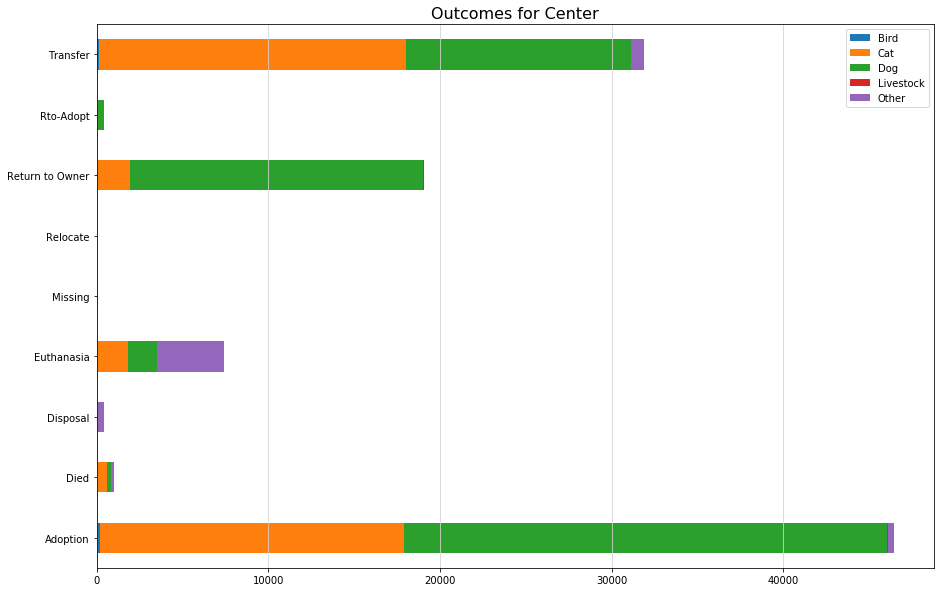

In [177]:
df_outcome_types_by_animal = df_outcomes.groupby(['Animal Type', 'Outcome Type'])['Animal ID'].count().unstack(level=0).fillna(0)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

df_outcome_types_by_animal.plot.barh(stacked=True, ax=ax);

ax.set_title('Outcomes for Center', fontsize=16)

# hide the y axis lable
y_axis = ax.yaxis
y_axis.label.set_visible(False)

ax.legend(loc='upper right')
ax.grid(b=True,which="both",axis="x",linestyle="-",color="lightgrey")
plt.show()

* Most outcomes for animals brought into the center are positive: Adoption, Transfers to other centers or Returned to Owners
    

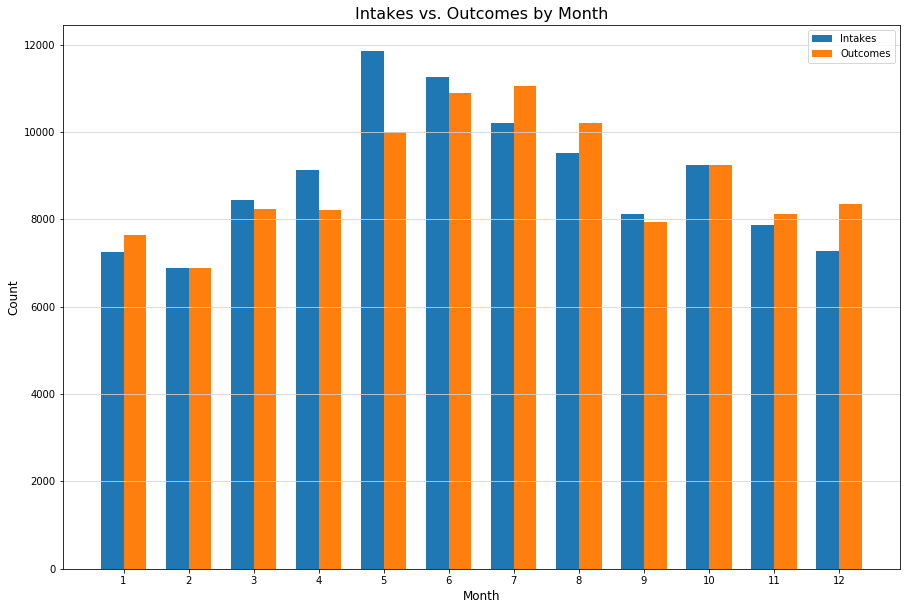

In [164]:
intakes_by_month = df_intakes.groupby(['Intake Month'])['Animal ID'].count()
outcomes_by_month = df_outcomes.groupby(['Outcome Month'])['Animal ID'].count()

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Intakes vs. Outcomes by Month', fontsize='16')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Count', fontsize='12')

bar_width = 0.35

intakes = ax.bar(intakes_by_month.index, intakes_by_month.values, bar_width,
                label="Intakes")

outcomes = ax.bar(outcomes_by_month.index+bar_width, outcomes_by_month.values,
                 bar_width, label="Outcomes")

ax.set_xticks(intakes_by_month.index + bar_width / 2)
ax.set_xticklabels(intakes_by_month.index)
ax.legend()
plt.grid (b=True,which="both",axis="y",linestyle="-",color="lightgrey")
plt.show()



# intakes_by_month.plot(kind='bar', color='orange', label='Intakes')
# outcomes_by_month.plot(kind='bar', color='blue', label='Outcomes')
# help(plt.bar)

* Combining all years data together and comparing intakes to outcomes by month, we see intakes and outcome align fairly closely.
* Again late spring to early summer (May - July) shows the largest number of intakes while the summer months (July - August) have the largest number of outcomes. 

In [205]:
df_combined = aacdata.combine_intake_outcome(df_intakes, df_outcomes)
df_combined = aacdata.remove_duplicate_animals(df_combined)

In [207]:
df_combined.dtypes

# add a new column to calc days in centers
# df_combined['DateTime Intake'] - df_combined['DateTime Outcome']

Animal ID           object
Name                object
DateTime Intake     object
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Age upon Intake     object
Breed               object
Color               object
Intake Month         int64
Intake Year          int64
Gender              object
DateTime Outcome    object
Outcome Type        object
Outcome Subtype     object
Age upon Outcome    object
Outcome Month        int64
Outcome Year         int64
dtype: object

In [249]:
# add new columns to format the intake and outcome as date only. Add new column to compute days in center
df_combined['Date Intake'] = pd.to_datetime(df_combined["DateTime Intake"]).dt.date
df_combined['Date Outcome'] = pd.to_datetime(df_combined["DateTime Outcome"]).dt.date
df_combined['Days in Center'] = (df_combined['Date Outcome'] - df_combined['Date Intake']).dt.days


# create dataframe of just adoptions of cats and dogs
df_adoptions = df_combined.loc[(df_combined['Outcome Type'] == 'Adoption') & df_combined['Animal Type'].isin(['Cat', 'Dog'])]


In [251]:
df_adoptions.dtypes

Animal ID           object
Name                object
DateTime Intake     object
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Age upon Intake     object
Breed               object
Color               object
Intake Month         int64
Intake Year          int64
Gender              object
DateTime Outcome    object
Outcome Type        object
Outcome Subtype     object
Age upon Outcome    object
Outcome Month        int64
Outcome Year         int64
Date Intake         object
Date Outcome        object
Days in Center       int64
dtype: object

In [277]:
def parse_age(a):
    #split string 
    age = a.split()
    total_months = 0
    if age[1] in('month', 'months'):
        total_months = int(age[0])
    elif age[1] in('year', 'years'):
        total_months = int(int(age[0])*12)
    elif age[1] in('week', 'weeks', 'day', 'days'):
        total_months = 0
    return total_months

In [284]:
df_adoptions['Intake Age in Months'] = df_adoptions['Age upon Intake'].apply(parse_age)
df_adoptions['Outcome Age in Months'] = df_adoptions['Age upon Outcome'].apply(parse_age)

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [285]:
df_adoptions.head()

,Animal ID,Name,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color,...,Outcome Type,Outcome Subtype,Age upon Outcome,Outcome Month,Outcome Year,Date Intake,Date Outcome,Days in Center,Intake Age in Months,Outcome Age in Months
19,A802984,Little Man,08/25/2019 03:55:00 PM,Austin (TX),Owner Surrender,Normal,Cat,5 months,Domestic Shorthair,Orange Tabby,...,Adoption,NaN,5 months,8,2019,2019-08-25,2019-08-27,2,5,5
27,A802963,Coco,08/25/2019 02:03:00 PM,Austin (TX),Owner Surrender,Normal,Dog,8 months,Bichon Frise Mix,White,...,Adoption,NaN,9 months,8,2019,2019-08-25,2019-08-27,2,8,9
35,A802880,NaN,08/24/2019 12:00:00 PM,Austin (TX),Owner Surrender,Normal,Cat,2 months,Domestic Shorthair,Blue/White,...,Adoption,NaN,2 months,8,2019,2019-08-24,2019-08-26,2,2,2
42,A802847,NaN,08/23/2019 04:22:00 PM,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,1 year,Chihuahua Shorthair,Brown/White,...,Adoption,NaN,1 year,8,2019,2019-08-23,2019-08-27,4,12,12
49,A802824,NaN,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,5 months,Border Collie Mix,White/Brown,...,Adoption,NaN,5 months,8,2019,2019-08-23,2019-08-27,4,5,5


## What are the factors to successful adoptions of Cats and Dogs?
Since Cats and Dogs are the two most common types of animals brought into the center, let's evaluate all adoptions of those animals and see if we can find any patterns to make an animal more or less likley to adopt.

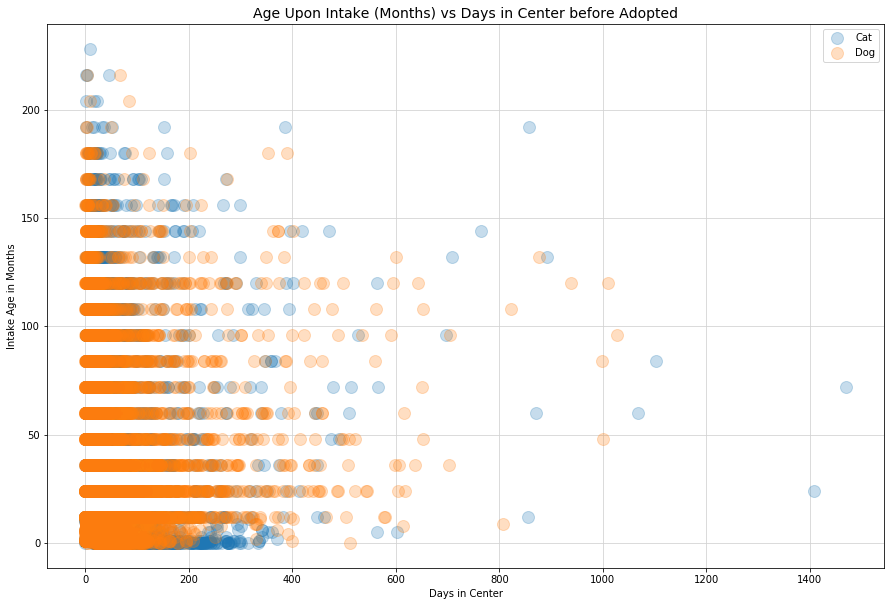

In [312]:
groups = df_adoptions.groupby('Animal Type')

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Days in Center'], group['Intake Age in Months'], marker='o', linestyle='', alpha=.25, ms=12, label=name)
ax.legend()

plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title('Age Upon Intake (Months) vs Days in Center before Adopted', fontsize=14)
plt.xlabel("Days in Center")
plt.ylabel("Intake Age in Months")
plt.show()

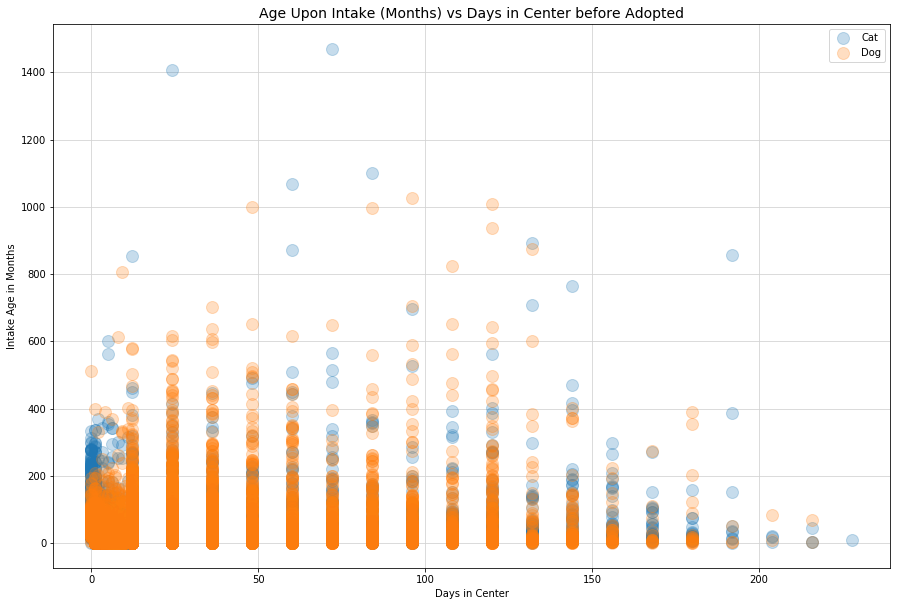

In [313]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Intake Age in Months'], group['Days in Center'], marker='o', linestyle='', alpha=.25, ms=12, label=name)
ax.legend()

plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title('Age Upon Intake (Months) vs Days in Center before Adopted', fontsize=14)
plt.xlabel("Days in Center")
plt.ylabel("Intake Age in Months")
plt.show()

* For both Cats and Dogs, the younger they are the shorter time they spend in the center

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127632080>]],
      dtype=object)

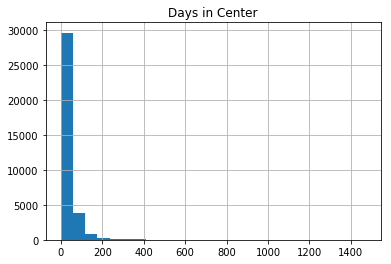

In [301]:
df_adoptions.hist(column='Days in Center', bins=25)

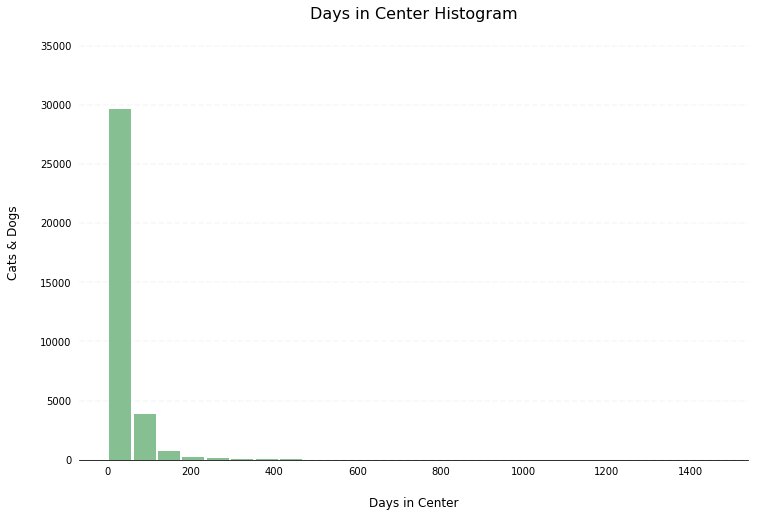

In [307]:
ax = df_adoptions.hist(column='Days in Center', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Days in Center Histogram", fontsize=16)

    # Set x-axis label
    x.set_xlabel("Days in Center", labelpad=20,  size=12)

    # Set y-axis label
    x.set_ylabel("Cats & Dogs", labelpad=20, size=12)

    # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

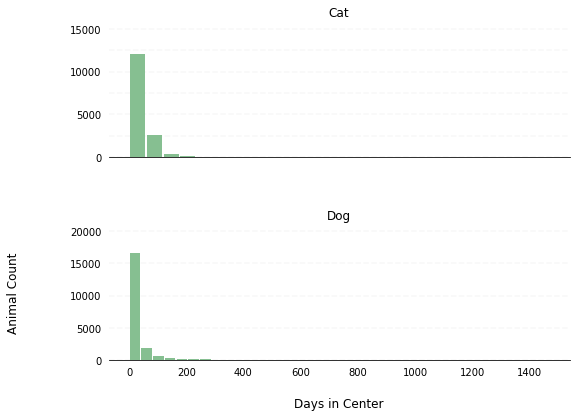

In [308]:
ax = df_adoptions.hist(column='Days in Center', by='Animal Type', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Days in Center", labelpad=20, size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Animal Count", labelpad=50,  size=12)

    # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

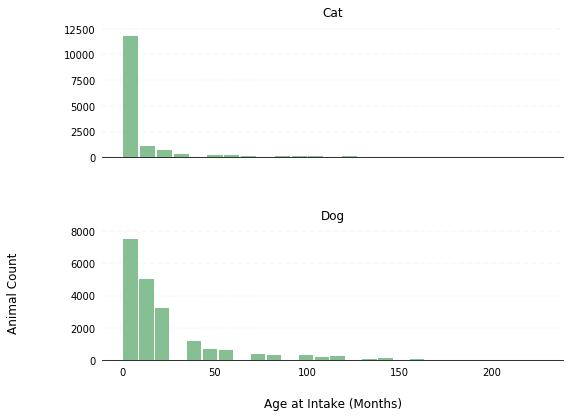

In [310]:
ax = df_adoptions.hist(column='Intake Age in Months', by='Animal Type', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Age at Intake (Months)", labelpad=20, size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Animal Count", labelpad=50,  size=12)

    # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:
# anova or tukey to see an assumptiong? Younger pets are adopted quicker than older pets?